*** Mushroom Calssifications with classifiers ***

https://www.kaggle.com/datasets/uciml/mushroom-classification

**Goal** - Predict if the mushroom is Edible or Poisonous (Class)

**Strategy** - Predict using standard Classifiers


**Setup**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
import zipfile

In [17]:
#read file
with zipfile.ZipFile('/content/drive/MyDrive/ds/C6-Data-Mushroom.csv.zip') as z:
   # open the csv file in the dataset
   with z.open('mushrooms.csv') as f:

      # read the dataset (first row is the url of the dataser)
      df = pd.read_csv(f,skiprows=1)
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**EDA**

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Target variable (Class) is balanced

<Axes: xlabel='class', ylabel='count'>

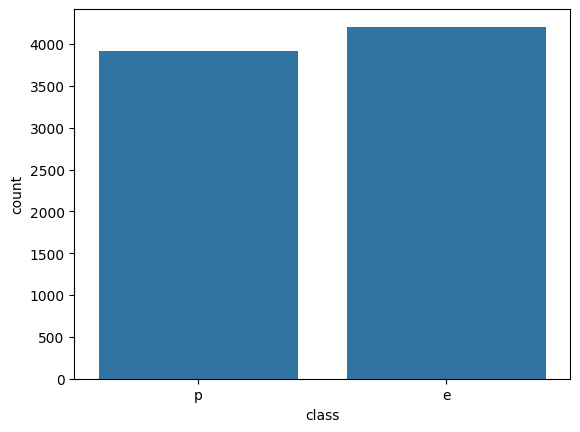

In [ ]:
sns.countplot(data=df, x='class')

Check for null valus

In [4]:
df.isnull().any()

,0
class,False
cap-shape,False
cap-surface,False
cap-color,False
bruises,False
odor,False
gill-attachment,False
gill-spacing,False
gill-size,False
gill-color,False


Inspect the unique values of every category

1.   All features are categorical nominal
2.   stalk-root has a value type  of ´?´ , these could be missing values
3.   veil_type is not discriminatory because it has only one category




In [8]:
for i in df.columns:
    print(i,df[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


The feature veil-type and stalk-rott will be removed (if the models have a poor performance I may try to input values instead of removing this feature)





<Axes: xlabel='stalk-root', ylabel='count'>

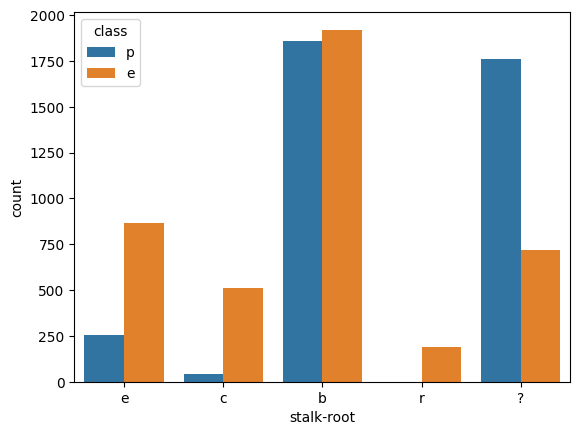

In [10]:
sns.countplot(x='stalk-root', data=df, hue='class')

In [18]:
#Removing columns with no descrimination
df = df.drop(['veil-type','stalk-root'], axis=1)
print("All columns",df.shape[1])

All columns 21


See distribution of all features to spot additional quality issues

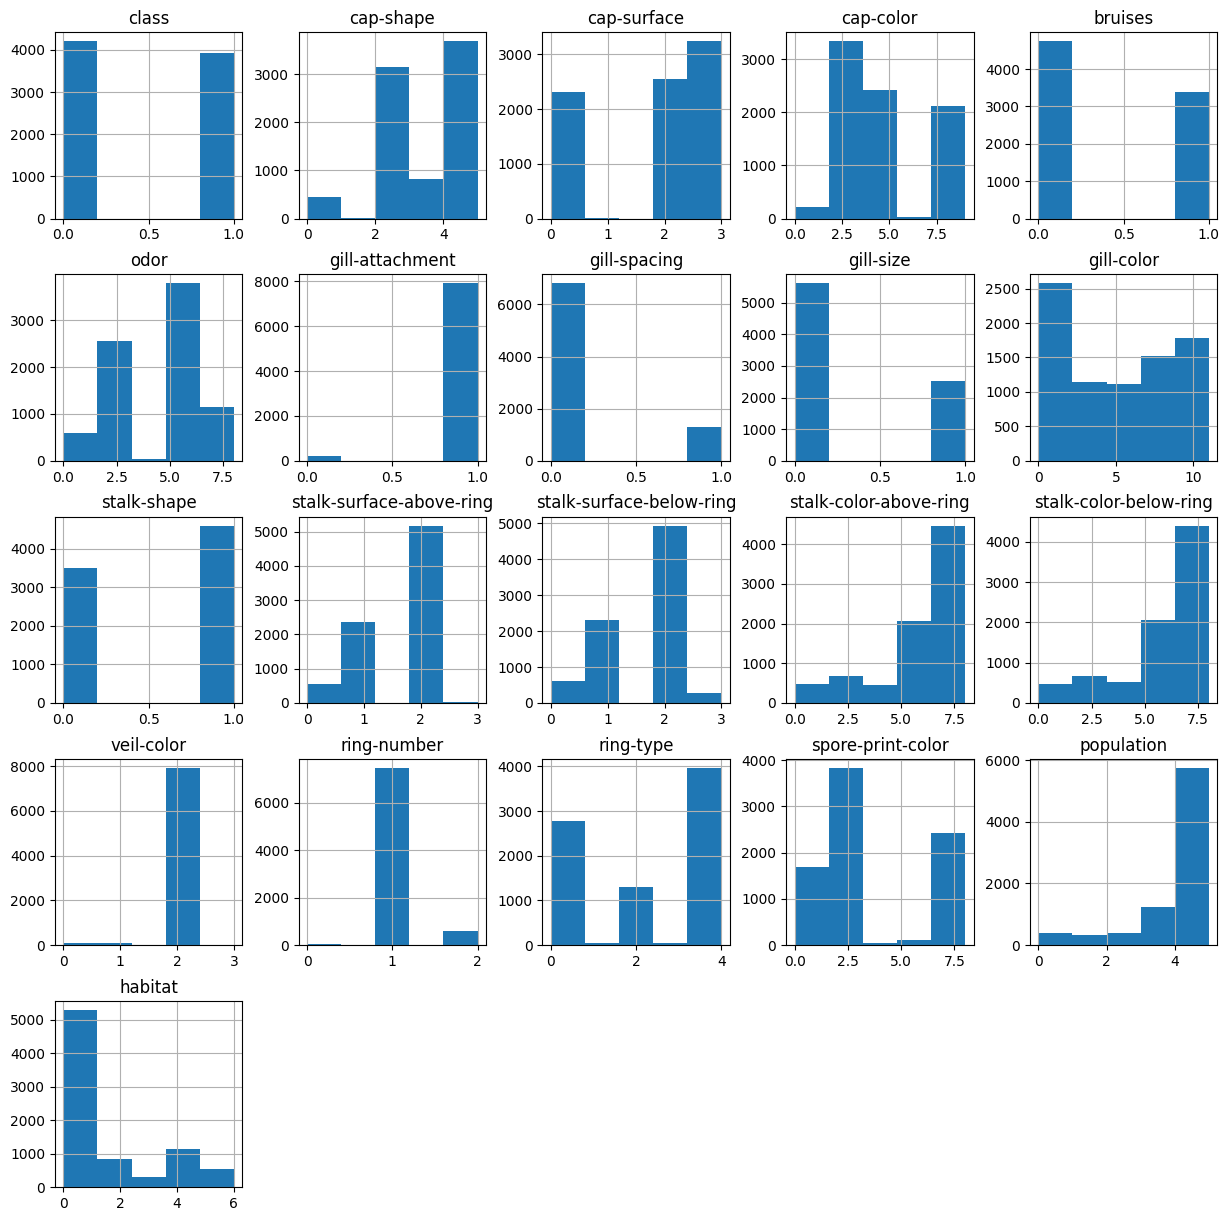

In [19]:
y = df['class']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
label_encoder = LabelEncoder()
df_hist = df.apply(label_encoder.fit_transform)
df_hist.hist(bins=5, figsize=(15,15));

Use Chi Square test to idenfify relationship with target features and maybe support the removal of additional features

H0 (The 2 features are not associated) is rejected for all, this is a good indication on the predicability of the datasource



In [24]:
df_chi = df.drop(['class'],axis=1)
chi_results = pd.DataFrame()
for i in df_chi.columns:
  cross_tab_tmp = pd.crosstab(index=df['class'],columns=df[i])
  chi_sq_result = chi2_contingency(cross_tab_tmp)
  f,p, x = i, chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept"
  df_tmp = pd.DataFrame({'Feature': [f], 'P-Value': [p], 'Status': [x]})
  chi_results = pd.concat([chi_results, df_tmp])
chi_results.sort_values("P-Value", ascending=True)


,Feature,P-Value,Status
0,habitat,0.000000e+00,reject
0,spore-print-color,0.000000e+00,reject
0,ring-type,0.000000e+00,reject
0,bruises,0.000000e+00,reject
0,odor,0.000000e+00,reject
0,stalk-color-below-ring,0.000000e+00,reject
0,gill-size,0.000000e+00,reject
0,gill-color,0.000000e+00,reject
0,population,0.000000e+00,reject
0,stalk-surface-above-ring,0.000000e+00,reject


Checking Feature Selection

Text(0.5, 1.0, 'Features and their Importance')

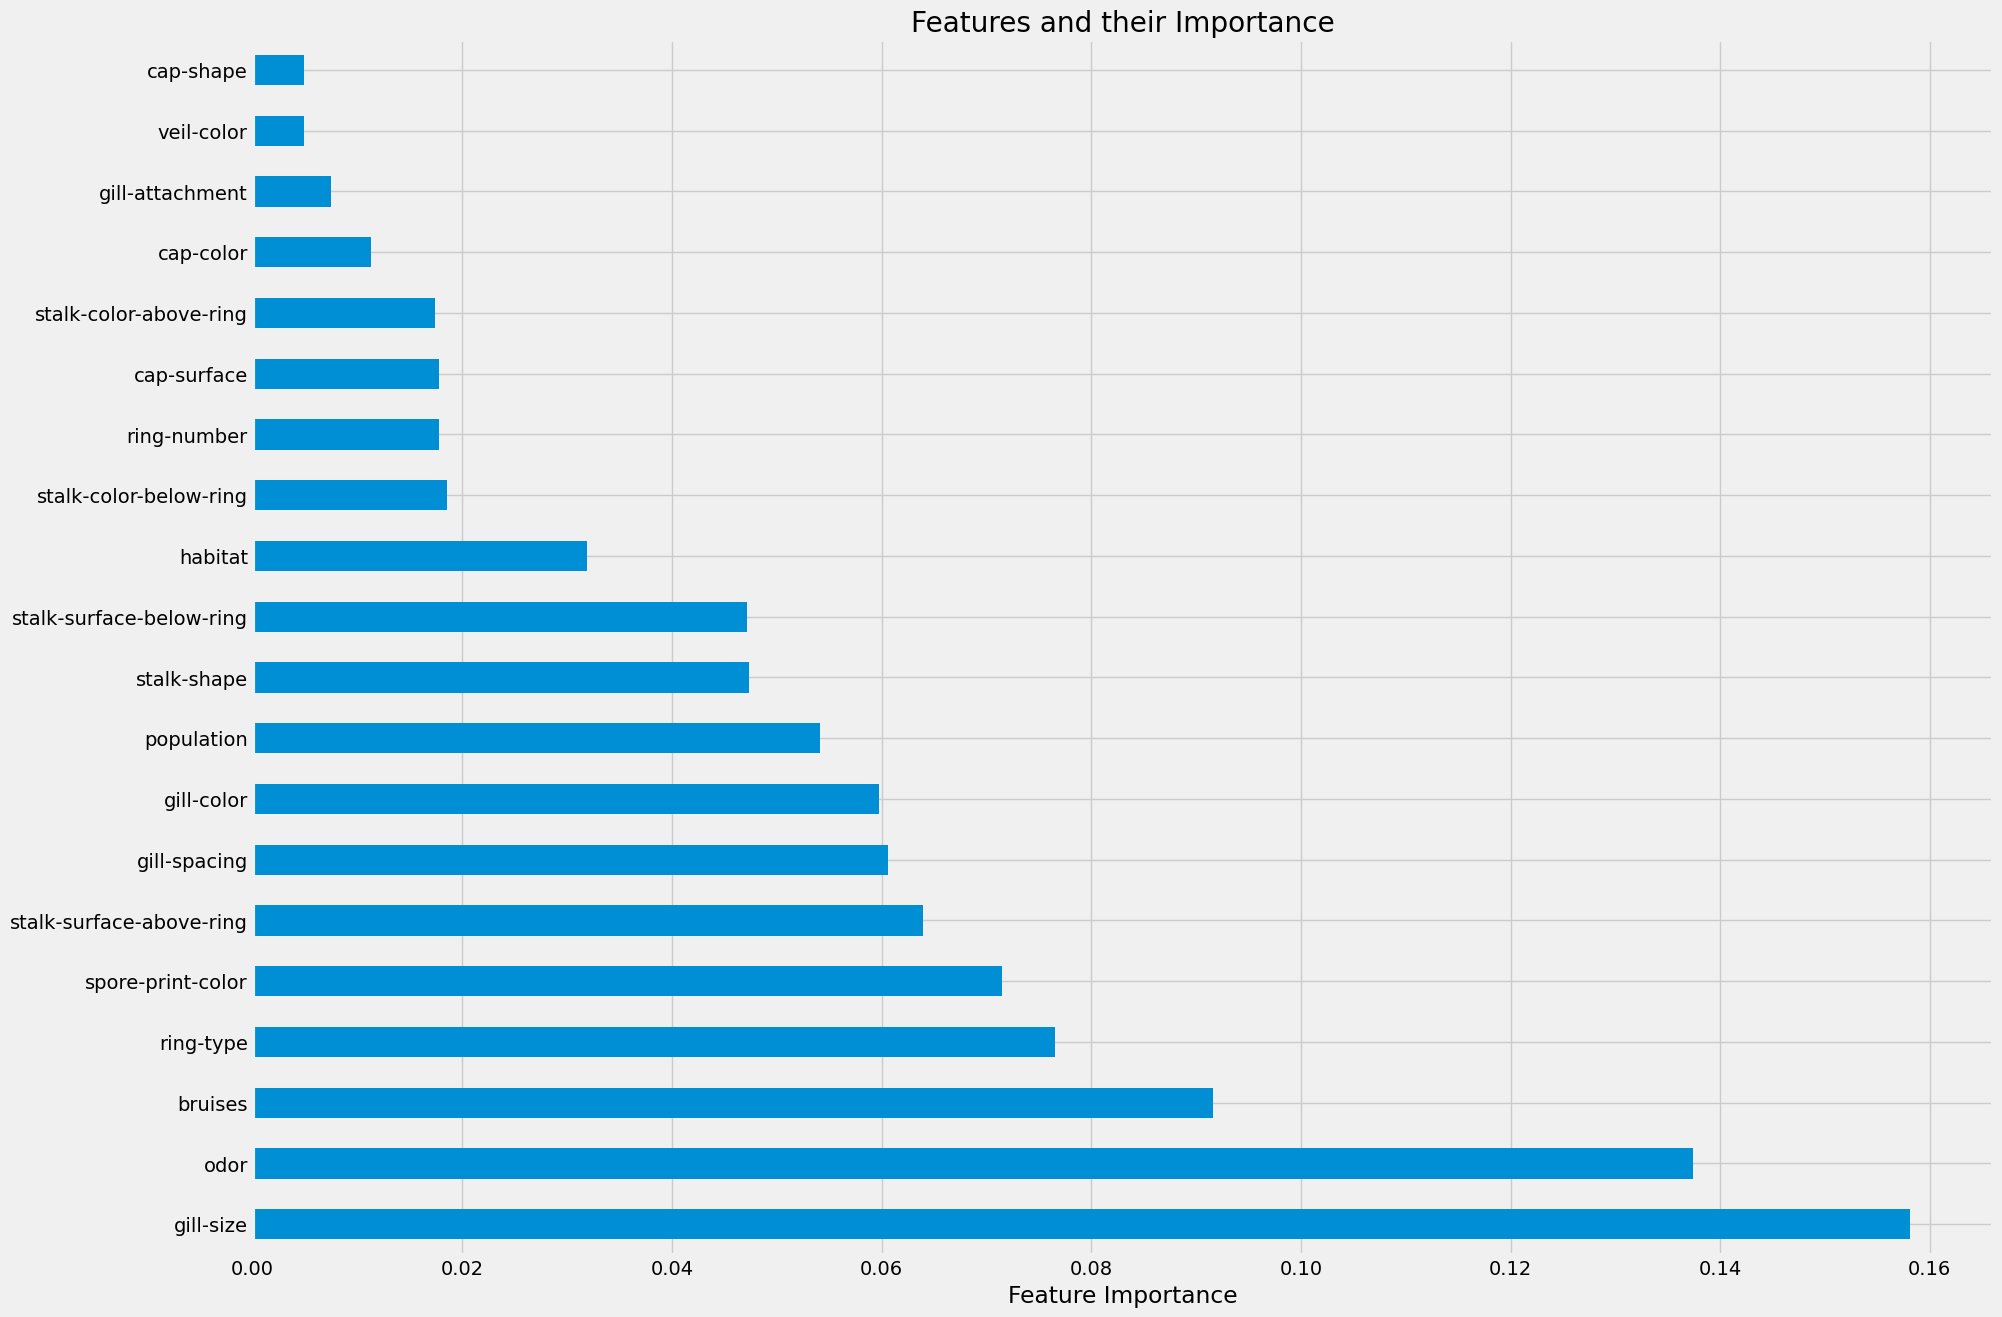

In [28]:
plt.figure(figsize=(20,15))
plt.style.use('fivethirtyeight')

et_clf = ExtraTreesClassifier(random_state=42)
et_clf.fit(df_hist.drop(['class'],axis=1), df_hist['class'])

pd.Series(et_clf.feature_importances_, index=df_hist.drop('class', axis=1).columns).nlargest(22).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Features and their Importance')

The approach will be to test the models with 3 datasets:


*   All features processed as dummy variables

*   The Top 12 features with higher importance from the feature selection and Chisquare (There is a drop after 12 in both analysis. This rational can be revisited if the models perform poorly)
*   Create PCA components to include 95 % of the explanatory value






Create 2 Datasets to train the model, Binary (with all columns) and a reduced approach using PCA

In [ ]:
df_binary = pd.get_dummies(df.drop('class',axis=1))

X = df_binary
pca = PCA(.95)
x_pc = pca.fit_transform(X)
print('# number of PCA components ',x_pc.shape[1])


# number of PCA components  40


In [ ]:
x_pc

array([[ 9.96245191e-01, -9.46891589e-01, -8.02493196e-01, ...,
         2.46897857e-02,  2.66694091e-15, -1.51835217e-01],
       [ 1.44173282e+00, -1.64154148e-01, -1.06817487e+00, ...,
         1.39089323e-01,  7.07106781e-01,  1.11097926e-01],
       [ 1.52408477e+00, -4.08745961e-01, -8.53171512e-01, ...,
        -4.17806509e-01, -7.07106781e-01,  1.73016373e-01],
       ...,
       [ 2.87816717e-01, -3.26213742e-01, -2.74663845e-01, ...,
         2.26229498e-01,  1.54631235e-15, -5.89649261e-02],
       [-1.93043302e+00, -1.57316304e+00,  1.15750528e-01, ...,
        -1.69097500e-02, -9.27353011e-16, -8.73532189e-02],
       [ 2.49297191e-01, -3.12292156e-01, -3.61868004e-01, ...,
         2.89964131e-01,  6.65700791e-16, -2.04387890e-01]])

**Train Test Split and Fitting Model**

In [ ]:
#binary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#pca
X_train_pc, X_test_pc, y_train_pc, y_test_pc = train_test_split(x_pc, y, test_size = 0.20)
#normalize pca

scaler = StandardScaler()
scaler.fit(X_train_pc)
X_train_pc = scaler.transform(X_train_pc)
X_test_pc = scaler.transform(X_test_pc)

def knn_tuning(k):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

def knn_tuning_pc(k):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train_pc, y_train_pc)
  y_pred = classifier.predict(X_test_pc)
  accuracy = accuracy_score(y_test_pc,y_pred)
  return accuracy

knn_results = pd.DataFrame({'K':np.arange(1, 116, 5)})

knn_results['Accuracy_knn_binary'] = knn_results['K'].apply(knn_tuning)
knn_results['Accuracy_knn_pc'] = knn_results['K'].apply(knn_tuning_pc)



1 to 16 K has an accuracy of 100% . This is suspicious

In [ ]:
knn_results

,K,Accuracy_knn_binary,Accuracy_knn_pc
0,1,1.000000,1.000000
1,6,1.000000,1.000000
2,11,1.000000,1.000000
3,16,1.000000,0.998769
4,21,0.999385,0.998769
5,26,0.999385,0.998154
6,31,0.999385,0.996923
7,36,0.999385,0.996308
8,41,0.999385,0.996308
9,46,0.999385,0.996308


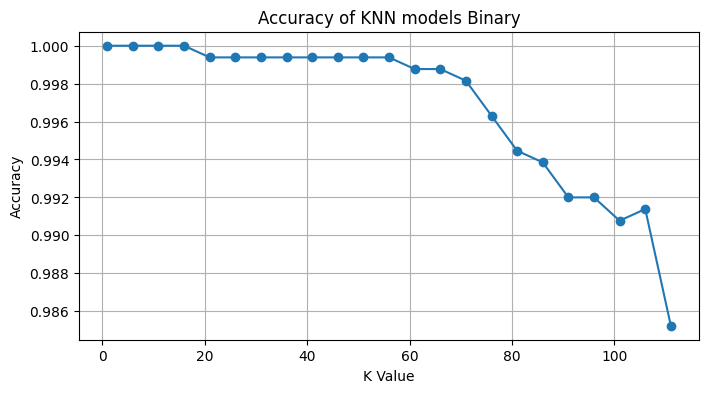

In [ ]:
# Visualize the accuracy of KNN models binary
k_values = knn_results['K']
k_accuracies = knn_results['Accuracy_knn_binary']

plt.figure(figsize=(8, 4))
plt.plot(k_values, k_accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN models Binary')
plt.grid(True)
plt.show()



Matrix for K 111

In [ ]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[443 401]
 [402 379]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       844
           1       0.49      0.49      0.49       781

    accuracy                           0.51      1625
   macro avg       0.51      0.51      0.51      1625
weighted avg       0.51      0.51      0.51      1625

Accuracy: 0.5058461538461538


Test the Model Performance with Cross Validation and 1 K.
The accuracy of 100% continues.

In [ ]:
#KNN grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [1],
    'weights': [ 'uniform'],
    'p': [2],
    'leaf_size': [30]
}

# Initialize GridSearchCV with KNeighborsClassifier
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=20, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best estimator
best_knn = grid_search.best_estimator_

# Predict with the best model
y_pred_train_knn = best_knn.predict(X_train)
y_pred_test_knn = best_knn.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters found by grid search:")
print(grid_search.best_params_)



def calculate_metrics(y_test, y_pred_test):
    # Calculate precision
    precision_test = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

    # Calculate recall
    recall_test = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

    return {
        'precision_test': precision_test,
        'recall_test': recall_test,
        'confusion_matrix': conf_matrix
    }


# Sample DataFrame with metrics placeholders
acc = np.zeros((1, 2))
columns = ['precision', 'recall']
rows = [ 'KNN']
results_df = pd.DataFrame(acc, columns=columns, index=rows)
# Calculate metrics
metrics = calculate_metrics(y_test, y_pred_test_knn)


# Print metrics
print(f"Precision (Test): {metrics['precision_test']:.2f}")
print(f"Recall (Test): {metrics['recall_test']:.2f}")
print("Confusion Matrix:")
print(metrics['confusion_matrix'])

Fitting 20 folds for each of 1 candidates, totalling 20 fits
Best parameters found by grid search:
{'leaf_size': 30, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Precision (Test): 1.00
Recall (Test): 1.00
Confusion Matrix:
[[844   0]
 [  0 781]]
